### Name: Abhinandan Pise 
### Email: abhipise5321@gmail.com

# 1 Basic Preprocessing 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

In [2]:
column = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width','class']
data = pd.read_csv('iris.data',names=column)

In [3]:
data.tail(3)

,Sepal_length,Sepal_width,Petal_length,Petal_width,class
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 1.1 NUMBER OF DATAPOINTS AND NUMBER OF FEATURES 

In [13]:
print('='*80)
print("Number of data points in data=", data.shape)
print('-'*80)
print("The attributes(columns or features) of data =\n", data.columns.values)
print('='*80)

Number of data points in data= (150, 5)
--------------------------------------------------------------------------------
The attributes(columns or features) of data =
 ['Sepal_length' 'Sepal_width' 'Petal_length' 'Petal_width' 'class']


## 1.2 UNIQUE LABELS IN DEPENDENT VARIABLE THAT Yi 

In [14]:
print('='*90)
print("Number of unique labels in class=",data['class'].unique())
print('='*90)

Number of unique labels in class= ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## 1.3 NULL VALUES BASIC STATISTICS OF FEATURES 

In [15]:
data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
class           0
dtype: int64

In [16]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2 DATA VISUALIZATION AND EXPLOLATORY DATA ANALYSIS 

## 2.1 PAIRPLOT OF IRIS DATASET 

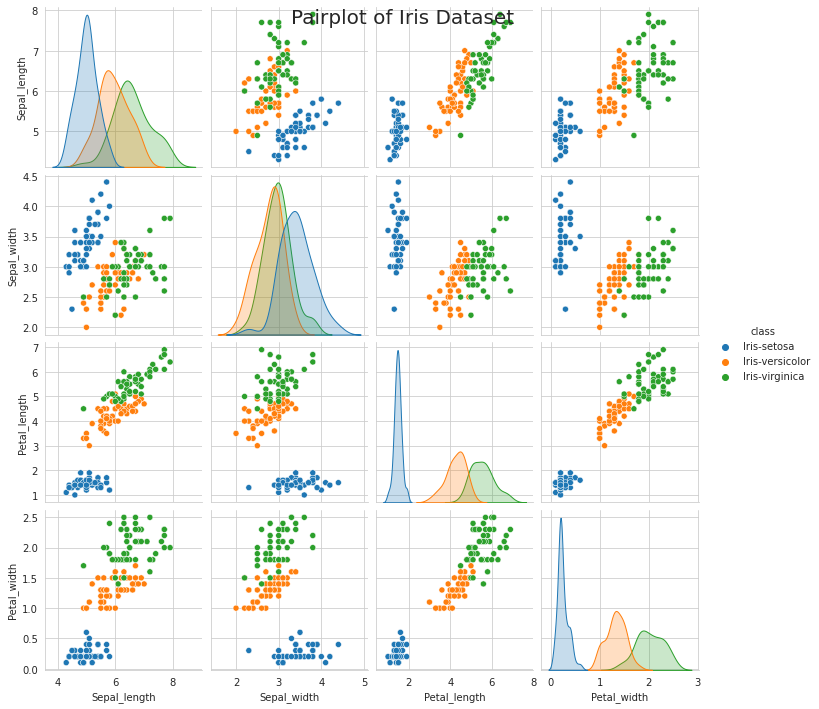

In [37]:
sns.set_style("whitegrid")
ax=sns.pairplot(data, hue="class")
ax.fig.suptitle("Pairplot of Iris Dataset ",size=20)
plt.show()

## 2.2 HISTOGRAM OF EVERY FEATURE 

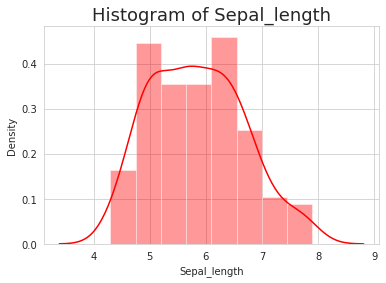

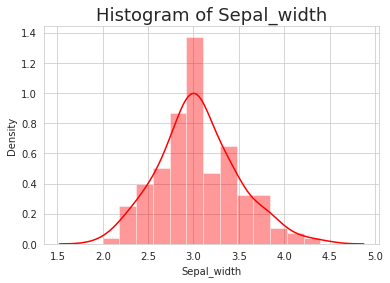

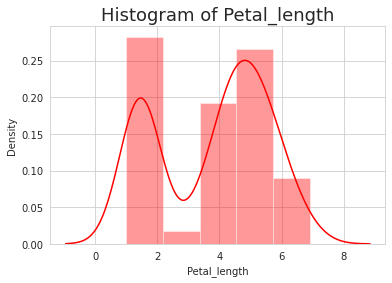

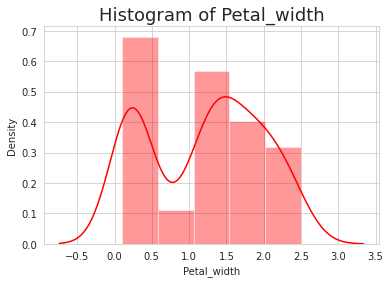

In [65]:
col_list=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
for i in col_list:
    plt.figure(figsize=(6,4))
    sns.set_style("whitegrid")
    sns.distplot(a=data[i],color="r")
    plt.title("Histogram of {}".format(i),fontsize=18)

## 2.3 BOX PLOT 

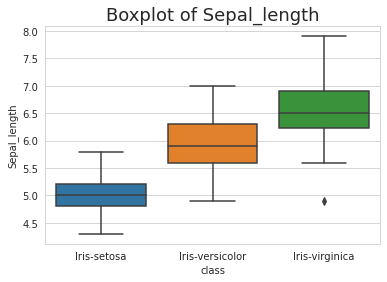

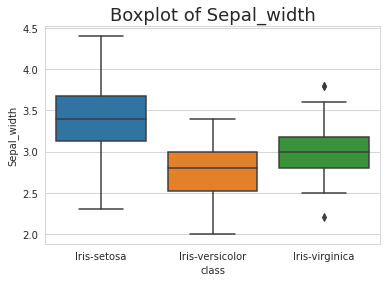

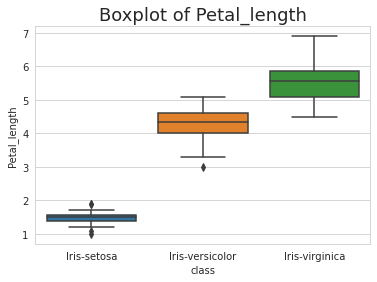

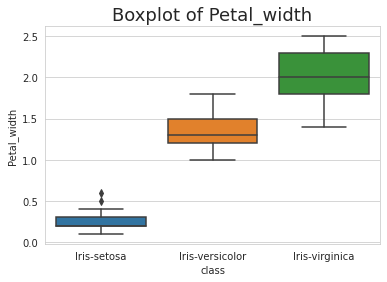

In [71]:
for i in col_list:
    plt.figure(figsize=(6,4))
    sns.set_style("whitegrid")
    sns.boxplot(x='class',y=i,data=data)
    plt.title("Boxplot of {}".format(i),fontsize=18)

#### OBSERVATIONS 
<br>1. PETAL LENGHT AND PETAL WIDTH IS IMPORTANT FEATURE, IRIS SETOSA IS CLEARLY SEPARABLE FROM OTHER 2 CLASS BASED ON THESE 2 FEATURE 
<br>2.PETAL LENGHT AND PEATAL WIDTH FOLLOWS APPR. NORMAL DISTRIBUTION 

## 2.4 SCATTERPLOT OF FEATURE SEPAL_LENGHT AND SEPAL_WIDTH 

Text(0.5, 1.0, 'Scatter plot of Sepal_width vs Sepal_lenght')

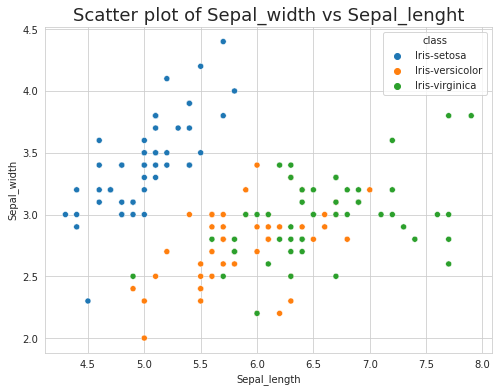

In [17]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(x=data['Sepal_length'],
                y=data['Sepal_width'],
                hue=data['class'])
plt.title("Scatter plot of Sepal_width vs Sepal_lenght",fontsize=18)

## 2.5 OUTPUT CLASS DISTRIBUTION 

<Figure size 432x288 with 0 Axes>

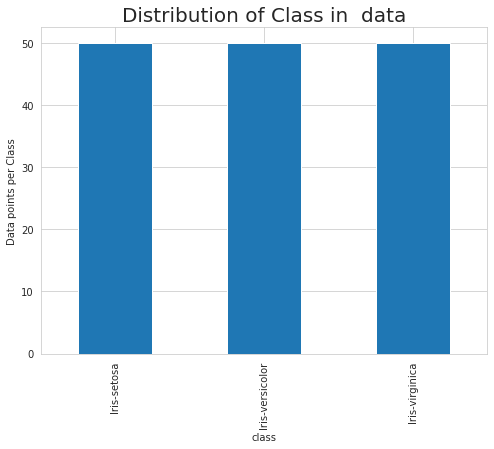

--------------------------------------------------------------------------------
Number of data points in class 1 : 50 ( 33.333 %)
Number of data points in class 2 : 50 ( 33.333 %)
Number of data points in class 3 : 50 ( 33.333 %)


In [18]:
# it returns a dict, keys as class labels and values as the number of data points in that class
 ##https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sortlevel.html
class_distribution = data['class'].value_counts().sort_index()

plt.figure()
plt.figure(figsize=(8,6))

my_colors = 'rgbkymc'
class_distribution.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Class in  data',fontsize=20)
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-class_distribution.values)
print('-'*80)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',
          class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')
print('='*80)


# 3 TRAIN TEST SPILT 80-20

In [19]:
X = data.drop(['class'], axis=1)
y = data['class'].values 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2)#80-20 split 

## 3.1 SCALING THE FEATURES 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # TO AVOID DATALEAKAGE FIT_TRANSFORM IS USED ON ONLY TRAINDATA

# 4 VARIOUS MODEL EXPERIMENTS 

## 4.1 MODEL 1 KNN 

### 4.1.1 KNN HYPERPARAMETER TUNE

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished


<Figure size 432x288 with 0 Axes>

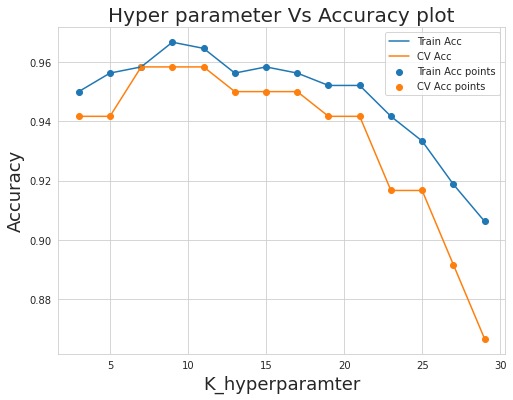

best_K_hyperparamter: {'n_neighbors': 7}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002466,0.000544,0.003093,0.000268,3,{'n_neighbors': 3},1.0,0.916667,0.958333,0.958333,0.875,0.941667,0.042492,7,0.937500,0.947917,0.958333,0.927083,0.979167,0.950000,0.017922
1,0.001482,0.000577,0.003527,0.000853,5,{'n_neighbors': 5},1.0,0.916667,0.958333,0.958333,0.875,0.941667,0.042492,7,0.927083,0.958333,0.958333,0.958333,0.979167,0.956250,0.016667
2,0.001148,0.000514,0.003613,0.001293,7,{'n_neighbors': 7},1.0,1.000000,0.958333,0.958333,0.875,0.958333,0.045644,1,0.947917,0.958333,0.958333,0.947917,0.979167,0.958333,0.011411
3,0.000981,0.000057,0.002846,0.000095,9,{'n_neighbors': 9},1.0,1.000000,0.958333,0.958333,0.875,0.958333,0.045644,1,0.947917,0.958333,0.958333,0.979167,0.989583,0.966667,0.015309
4,0.000904,0.000077,0.004863,0.003934,11,{'n_neighbors': 11},1.0,1.000000,0.958333,0.958333,0.875,0.958333,0.045644,1,0.947917,0.947917,0.958333,0.979167,0.989583,0.964583,0.016925


In [23]:
#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
classifier_knn=KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29]}
clf = GridSearchCV(classifier_knn,parameters, cv= 5, 
                   scoring='accuracy',return_train_score=True,
                   n_jobs=-1,verbose=2)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

clf.fit(X_train_scaled, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
train_acc= results['mean_train_score']
cv_acc = results['mean_test_score'] 
K_hyperparamter= results['param_n_neighbors']

plt.figure()
plt.figure(figsize=(8,6))
plt.plot(K_hyperparamter, train_acc, label='Train Acc')
# here: https://stackoverflow.com/a/48803361/4084039
plt.plot(K_hyperparamter, cv_acc, label='CV Acc')
#here: https://stackoverflow.com/a/48803361/4084039

plt.scatter(K_hyperparamter, train_acc, label='Train Acc points')
plt.scatter(K_hyperparamter, cv_acc, label='CV Acc points')

plt.legend()
plt.xlabel("K_hyperparamter",fontsize=18)
plt.ylabel("Accuracy",fontsize=18)
plt.title("Hyper parameter Vs Accuracy plot",fontsize=20)
plt.show()

best_K_hyperparamter=clf.best_params_
print("="*100)
print("best_K_hyperparamter:",best_K_hyperparamter)
best_K_hyperparamter=best_K_hyperparamter.get("n_neighbors")
print("="*100)
results.head()

### 4.1.2 BEST HYPERPARAMTER K=7 AND KNN MODEL 

In [24]:
classifier_knn=KNeighborsClassifier(n_neighbors=7)
classifier_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

### 4.1.3 RESULTS CONFUSION MATRIX AND CLASSIFICATION REPORT FOR KNN MODEL 

Confusion Matrix_KNN

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


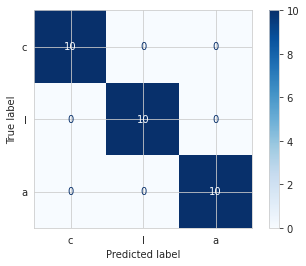


Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [29]:
y_pred = classifier_knn.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix_KNN\n')
print(confusion)

disp = plot_confusion_matrix(classifier_knn,
                             X_test_scaled,
                             y_test,
                             display_labels='class',
                             cmap=plt.cm.Blues)
plt.show()

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, 
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

In [30]:
predicted_class_label = classifier_knn.predict([[5.1,3.5,1.4,0.2]])
print('='*80)
print('''Classifier KNN Predicted class label for input "5.1,3.5,1.4,0.2"= ''',
      predicted_class_label[0])
print('='*80)

Classifier KNN Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-virginica


## 4.2 MODEL 2LOGISTIC REGRESSION

### 4.2.1 HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.6s finished


<Figure size 432x288 with 0 Axes>

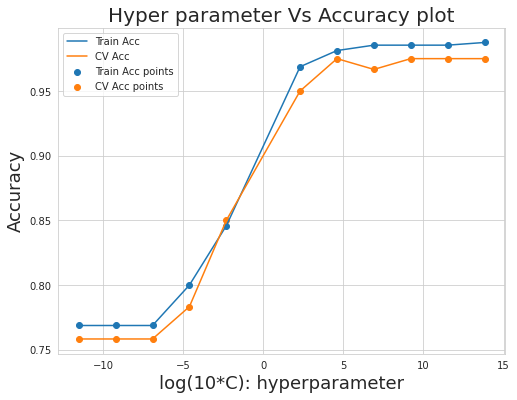

Best_hyperparameter_best_C: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007923,0.003737,0.000664,0.000115,1e-06,{'C': 1e-06},0.791667,0.833333,0.791667,0.75,0.625,0.758333,0.071686,9,0.770833,0.75,0.739583,0.760417,0.822917,0.76875,0.029017
1,0.006627,0.002908,0.000558,0.000083,1e-05,{'C': 1e-05},0.791667,0.833333,0.791667,0.75,0.625,0.758333,0.071686,9,0.770833,0.75,0.739583,0.760417,0.822917,0.76875,0.029017


In [32]:
#LR=LogisticRegression(random_state=0,penalty='l2',class_weight='balanced')
LR=LogisticRegression(multi_class='multinomial', solver='lbfgs')
parameters = {'C':[0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}
clf = GridSearchCV(LR,parameters, cv= 5, 
                   scoring='accuracy',return_train_score=True,
                   n_jobs=-1,verbose=2)

#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv

clf.fit(X_train_scaled, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
train_acc= results['mean_train_score']
cv_acc = results['mean_test_score'] 
C_hyperparamter= results['param_C']

log_c_LR=[]
for i in C_hyperparamter:
    x=math.log(10*i)
    log_c_LR.append(x)


plt.figure()
plt.figure(figsize=(8,6))
plt.plot(log_c_LR, train_acc, label='Train Acc')
# here: https://stackoverflow.com/a/48803361/4084039
plt.plot(log_c_LR, cv_acc, label='CV Acc')
#here: https://stackoverflow.com/a/48803361/4084039

plt.scatter(log_c_LR, train_acc, label='Train Acc points')
plt.scatter(log_c_LR, cv_acc, label='CV Acc points')

plt.legend()
plt.xlabel("log(10*C): hyperparameter",fontsize=18)
plt.ylabel("Accuracy",fontsize=18)
plt.title("Hyper parameter Vs Accuracy plot",fontsize=20)

plt.show()

best_C=clf.best_params_
print("="*100)
print("Best_hyperparameter_best_C:",best_C)
Best_hyperparameter_best_C=best_C.get("C_hyperparamter")
print("="*100)
results.head(2)

### 4.2.2 BEST HYPERPARAMETER LOGISTIC REGRESSION 

In [33]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(C=10,
                        multi_class='multinomial', solver='lbfgs')
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4.2.3 RESULTS AND CONFUSION MATRIX OF LOGISTIC REGRESSION 

Confusion Matrix_LR

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


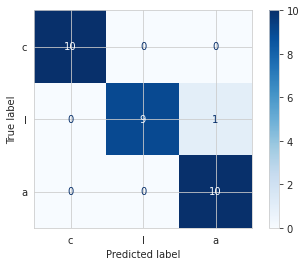


Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [34]:
y_pred = classifier_LR.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix_LR\n')
print(confusion)

disp = plot_confusion_matrix(classifier_LR,
                             X_test_scaled,
                             y_test,
                             display_labels='class',
                             cmap=plt.cm.Blues)
plt.show()

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, 
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

In [35]:
predicted_class_label = classifier_LR.predict([[5.1,3.5,1.4,0.2]])
print('='*80)
print('''Classifier LR Predicted class label for input "5.1,3.5,1.4,0.2"= ''',
      predicted_class_label[0])
print('='*80)

Classifier LR Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-versicolor


## 4.3 MODEL 3 RANDOM FOREST 

### 4.3.1 HYPERPARAMETER TUNING OF RANDOM FOREST MODEL 

In [36]:
%timeit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
parameters = {'n_estimators': [10,15,20,25,30,35,40,45,50,55,60,65,70],
              'max_depth':[2, 3, 4, 5, 6, 7]}

clf = GridSearchCV(RF,parameters,cv= 5, scoring='accuracy',
                   return_train_score=True,n_jobs=-1,verbose=2)
clf.fit(X_train, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
train_acc= results['mean_train_score']
cv_acc = results['mean_test_score']
n_estimators= results['param_n_estimators']
max_depth= results['param_max_depth']

best_n_estimators=clf.best_params_
print("="*100)
Best_hyperparameter_RF_n_estimators=best_n_estimators.get("n_estimators")
print("Best_hyperparameter_RF_n_estimators:",Best_hyperparameter_RF_n_estimators)
print("="*100)
#results.head(2)

best_max_depth=clf.best_params_
print("="*100)
Best_hyperparameter_RF_max_depth=best_max_depth.get("max_depth")
print("Best_hyperparameter_RF_max_depth:",Best_hyperparameter_RF_max_depth)
print("="*100)
#results.head(2)


Fitting 5 folds for each of 78 candidates, totalling 390 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.3s


Best_hyperparameter_RF_n_estimators: 20
Best_hyperparameter_RF_max_depth: 2


[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed:   22.2s finished


### 4.3.2 BEST HYPERPARAMETER RANDOM FOREST AND CLASSIFICATION REPORT AND CONFUSION MATRIX 

Confusion Matrix_RF

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


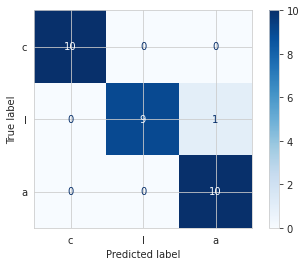


Classification Report RF_Classifier

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [37]:
classifier_RF = RandomForestClassifier(n_estimators = 20,
                                    max_depth=2,
                                    criterion = 'entropy', 
                                    random_state = 42)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)

confusion_matrix_RF = confusion_matrix(y_test, y_pred)
print('Confusion Matrix_RF\n')
print(confusion_matrix_RF)
disp = plot_confusion_matrix(classifier_RF,
                             X_test,
                             y_test,
                             display_labels='class',
                             cmap=plt.cm.Blues)
plt.show()


from sklearn.metrics import classification_report
print('\nClassification Report RF_Classifier\n')
print(classification_report(y_test, y_pred, 
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

In [38]:
predicted_class_label = classifier_RF.predict([[5.1,3.5,1.4,0.2]])
print('='*80)
print('''classifier_RF Predicted class label for input  "5.1,3.5,1.4,0.2"= ''',
      predicted_class_label[0])
print('='*80)

classifier_RF Predicted class label for input  "5.1,3.5,1.4,0.2"=  Iris-setosa


## 4.4 MODEL 4 DECISION TREE 

### 4.4.1 DECISION TREE MODEL TRAINING 

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT=DecisionTreeClassifier(criterion= 'entropy')
classifier_DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 4.4.2 RESULTS ,CONFUSION MATRIX AND CLASSIFICATION REPORT OF DECISION TREE 

Confusion Matrix

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


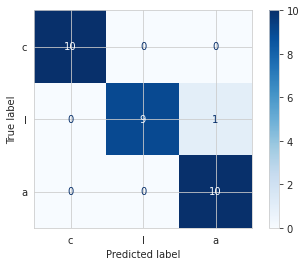


Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [40]:
from sklearn.metrics import confusion_matrix
y_pred = classifier_DT.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)



disp = plot_confusion_matrix(classifier_DT,
                             X_test,
                             y_test,
                             display_labels='class',
                             cmap=plt.cm.Blues)
plt.show()


print('\nClassification Report\n')
print(classification_report(y_test, y_pred, 
                            target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

In [41]:
predicted_class_label = classifier_DT.predict([[5.1,3.5,1.4,0.2]])
print('='*80)
print('''Predicted class label for input "5.1,3.5,1.4,0.2"= ''',predicted_class_label[0])
print('='*80)

Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-setosa


# 5 FEATURE IMPORATNACE COMPARISON OF MODELS   

## 5.1 FEATURE IMPORTANCE USING RANDOM FOREST MODEL 

Text(0.5, 1.0, 'feature_importance_RF using Random_forest Model')

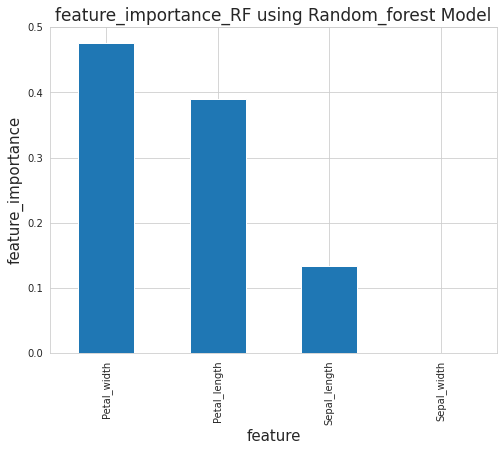

In [42]:
feature_importance_RF = pd.Series(classifier_RF.feature_importances_,
                        index=['Sepal_length',
                               'Sepal_width',
                               'Petal_length',
                               'Petal_width']).sort_values(ascending=False)

plt.figure()
ax=feature_importance_RF.plot.bar(figsize=(8,6))
ax.set_ylabel('feature_importance',fontsize=15)
ax.set_xlabel('feature',fontsize=15)
ax.set_title('feature_importance_RF using Random_forest Model',fontsize=17)

## 5.2 FINAL PREDICTION FOR THE INPUT [5.1,3.5,1.4,0.2] USING DIFFERENT CLASSIFIERS 

In [43]:
def final_prediction(model,name):
    '''
    This function takes model and model name as input
    predicts the output label for given Quesry point [5.1,3.5,1.4,0.2]
    '''

    predicted_class_label = model.predict([[5.1,3.5,1.4,0.2]])
    print('='*90)
    print(''' {} Predicted class label for input "5.1,3.5,1.4,0.2"= '''.format(name),
          predicted_class_label[0])
    print('='*90)

In [46]:
list_model=[classifier_knn,classifier_LR,classifier_RF,classifier_DT]
model_name=['classifier_knn','classifier_LR','classifier_RF','classifier_DT']
for i in range(0,4):
    final_prediction(list_model[i],model_name[i])
  

 classifier_knn Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-virginica
 classifier_LR Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-versicolor
 classifier_RF Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-setosa
 classifier_DT Predicted class label for input "5.1,3.5,1.4,0.2"=  Iris-setosa


In [15]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["SR.NO.","Model", "ACCURACY",
                 "EXPECTED_RESULT_ON_SAMPLE_INPUT_“5.1,3.5,1.4,0.2”"]

x.add_row(["1","KNN", '1','Iris-versicolor'])
x.add_row(["2","LOGISTIC_REGRESSION", '0.97','Iris-versicolor'])
x.add_row(["3","RANDOM_FOREST", '0.97','Iris-setosa'])
x.add_row(["4","DECISION_TREE", '0.97','Iris-setosa'])

print(x)

+--------+---------------------+----------+---------------------------------------------------+
| SR.NO. |        Model        | ACCURACY | EXPECTED_RESULT_ON_SAMPLE_INPUT_“5.1,3.5,1.4,0.2” |
+--------+---------------------+----------+---------------------------------------------------+
|   1    |         KNN         |    1     |                  Iris-versicolor                  |
|   2    | LOGISTIC_REGRESSION |   0.97   |                  Iris-versicolor                  |
|   3    |    RANDOM_FOREST    |   0.97   |                    Iris-setosa                    |
|   4    |    DECISION_TREE    |   0.97   |                    Iris-setosa                    |
+--------+---------------------+----------+---------------------------------------------------+


<font color=blue>*__OBSERVATION:__*<br>
1.THOUGH KNN IS PERFORMING WELL IN TERMS OF ACCURACY IT IS GIVING WRONG PREDICTION FOR UNKNOWN QUERY POINT <br> 
2.TREE BASED ALGORITHM IS PERFORMING WELL ON UNKNOWN QUERY POINT<br>
3.AS THERE ARE LESS FEATURES TREE BASED ALGORTHM WILL BE PERFROMING GOOD<BR><font color=red>4.*THERFORE FINAL MODEL IS RANDOM FOREST *<br> <font color=blue>